# 0. 데이터 로드

In [610]:
# | code-fold : true
import pandas as pd
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "plotly_mimetype+notebook_connected"
import warnings

warnings.filterwarnings(action = "ignore")

In [611]:
for i in range(1,10) :
    exec(f"df{i} = pd.read_csv('data/{i}.csv', encoding = 'cp949')") 
    exec(f"df{i}['공시연도'] = df{i}['공시연도'].astype(str)")

# 1. key값 설정

`-` key = "학교코드" + "공시년도"

In [612]:
for i in range(1,10) :
    exec(f"df{i}['key'] = [i+ '-' + j for i,j in zip(df{i}['정보공시 학교코드'], df{i}['공시연도'])]")

`-` 결과 확인

In [613]:
df1["key"]

0       S000003511-2021
1       S000003563-2021
2       S010000738-2021
3       S010000741-2021
4       S010000742-2021
             ...       
4075    S010005841-2024
4076    S010006026-2024
4077    S010006027-2024
4078    S010006380-2024
4079    S010005864-2024
Name: key, Length: 4080, dtype: object

In [614]:
df2["key"]

0       S000003511-2021
1       S000003563-2021
2       S010000738-2021
3       S010000741-2021
4       S010000742-2021
             ...       
5373    S010006331-2024
5374    S010006400-2024
5375    S010006411-2024
5376    S010006412-2024
5377    S010006471-2024
Name: key, Length: 5378, dtype: object

`-` 각 데이터 셋의 길이가 조금 다른 것 같다.

# 2. 데이터셋 합치기 (1)

`-` 일단 df1, df2만 합쳐보자

In [615]:
df1.columns

Index(['시도교육청', '시도교육청코드', '교육지원청', '교육지원청코드', '지역', '지역코드', '소재지구분코드',
       '정보공시 학교코드', '학교명', '학교급코드', '설립구분', '제외여부', '제외사유', '교과교실제(지정?운영)',
       '자율학교(지정?운영)', '수준별 수업(운영)', '영어교육프로그램(운영)(2020년 이전)', '학교과정구분값(2-3-4)',
       '학교과정구분명(초-중-고)', '공시연도', 'key'],
      dtype='object')

In [616]:
df2.columns

Index(['시도교육청', '시도교육청코드', '교육지원청', '교육지원청코드', '지역', '지역코드', '소재지구분코드',
       '정보공시 학교코드', '학교명', '학교급코드', '설립구분', '제외여부', '제외사유', '연간보건실 이용건수',
       '전체학생수', '연간1인당 보건실이용건수', '학교과정구분값(2-3-4)', '학교과정구분명(초-중-고)', '공시연도',
       'key'],
      dtype='object')

In [617]:
df9.columns

Index(['시도교육청', '시도교육청코드', '교육지원청', '교육지원청코드', '지역', '지역코드', '소재지구분코드',
       '정보공시 학교코드', '학교명', '학교급코드', '설립구분', '제외여부', '제외사유', '교장(남)', '교장(여)',
       '교장(계)', '교감(남)', '교감(여)', '교감(계)', '수석교사(남)', '수석교사(여)', '수석교사(계)',
       '정교사(1정)(남)', '정교사(1정)(여)', '정교사(1정)(계)', '정교사(2정)(남)', '정교사(2정)(여)',
       '정교사(2정)(계)', '특수1정(남)', '특수1정(여)', '특수1정(계)', '특수2정(남)', '특수2정(여)',
       '특수2정(계)', '준교사(남)', '준교사(여)', '준교사(계)', '실기교사(남)', '실기교사(여)',
       '실기교사(계)', '전문상담교사(남)', '전문상담교사(여)', '전문상담교사(계)', '사서교사(남)', '사서교사(여)',
       '사서교사(계)', '보건교사(남)', '보건교사(여)', '보건교사(계)', '영양교사(남)', '영양교사(여)',
       '영양교사(계)', '해당없음(남)', '해당없음(여)', '해당없음(계)', '계(남)', '계(여)', '계',
       '학교과정구분값(2-3-4)', '학교과정구분명(초-중-고)', '공시연도', 'key'],
      dtype='object')

`-` 컬럼명을 확인해보았을 때 `시도교육청` ~ `제외사유,'학교과정구분값(2-3-4)', '학교과정구분명(초-중-고)', '공시연도'`까지는 중복되는 컬럼이므로 제거할 제거할 필요가 있어보임

* 첫 번째 데이터 셋인 `df1`을 제외하고 해당 컬럼들을 제거해주자

In [618]:
drop_col = ['시도교육청', '시도교육청코드', '교육지원청', '교육지원청코드', '지역', '지역코드', '소재지구분코드',
       '정보공시 학교코드', '학교명', '학교급코드', '설립구분', '제외여부', '제외사유', 
            '학교과정구분값(2-3-4)', '학교과정구분명(초-중-고)', '공시연도']

In [619]:
for i in range(2,10) :
    exec(f"df{i} = df{i}.loc[: ,map(lambda  x : x not in drop_col, df{i}.columns)]")

In [620]:
df2.columns

Index(['연간보건실 이용건수', '전체학생수', '연간1인당 보건실이용건수', 'key'], dtype='object')

In [621]:
df9.columns

Index(['교장(남)', '교장(여)', '교장(계)', '교감(남)', '교감(여)', '교감(계)', '수석교사(남)',
       '수석교사(여)', '수석교사(계)', '정교사(1정)(남)', '정교사(1정)(여)', '정교사(1정)(계)',
       '정교사(2정)(남)', '정교사(2정)(여)', '정교사(2정)(계)', '특수1정(남)', '특수1정(여)',
       '특수1정(계)', '특수2정(남)', '특수2정(여)', '특수2정(계)', '준교사(남)', '준교사(여)',
       '준교사(계)', '실기교사(남)', '실기교사(여)', '실기교사(계)', '전문상담교사(남)', '전문상담교사(여)',
       '전문상담교사(계)', '사서교사(남)', '사서교사(여)', '사서교사(계)', '보건교사(남)', '보건교사(여)',
       '보건교사(계)', '영양교사(남)', '영양교사(여)', '영양교사(계)', '해당없음(남)', '해당없음(여)',
       '해당없음(계)', '계(남)', '계(여)', '계', 'key'],
      dtype='object')

`-` 데이터셋 합치기

In [622]:
df1.shape, df2.shape, df9.shape

((4080, 21), (5378, 4), (5467, 46))

* 보시다시피 각 데이터 셋의 길이가 모두 다르므로 `outer`방식으로 데이터를 합쳐야 할 것 같음

`-` 일단 total 데이터셋 생성

In [623]:
total = pd.merge(df1, df2, how = "outer", on = "key")

In [624]:
total.head()

,시도교육청,시도교육청코드,교육지원청,교육지원청코드,지역,지역코드,소재지구분코드,정보공시 학교코드,학교명,학교급코드,...,자율학교(지정?운영),수준별 수업(운영),영어교육프로그램(운영)(2020년 이전),학교과정구분값(2-3-4),학교과정구분명(초-중-고),공시연도,key,연간보건실 이용건수,전체학생수,연간1인당 보건실이용건수
0,서울특별시교육청,A000000001,교육부,A000000001,서울특별시 서초구,1.165011e+09,1.0,S000003511,서울교육대학교부설초등학교,2.0,...,○,×,NaN,NaN,NaN,2021,S000003511-2021,684.0,614.0,1.1
1,서울특별시교육청,A000000001,교육부,A000000001,서울특별시 서초구,1.165011e+09,1.0,S000003511,서울교육대학교부설초등학교,2.0,...,○,×,NaN,NaN,NaN,2022,S000003511-2022,4503.0,611.0,7.4
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,S000003511-2023,9027.0,612.0,14.8
3,서울특별시교육청,A000000001,서울특별시강남서초교육지원청,B100000249,서울특별시 서초구,1.165011e+09,1.0,S000003511,서울교육대학교부설초등학교,2.0,...,○,×,NaN,NaN,NaN,2024,S000003511-2024,9531.0,610.0,15.6
4,서울특별시교육청,A000000001,교육부,A000000001,서울특별시 성북구,1.129014e+09,1.0,S000003514,서울대학교사범대학부설중학교,3.0,...,×,○,NaN,3,중,2021,S000003514-2021,1431.0,625.0,2.3


In [625]:
total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5426 entries, 0 to 5425
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   시도교육청                   4080 non-null   object 
 1   시도교육청코드                 4080 non-null   object 
 2   교육지원청                   4080 non-null   object 
 3   교육지원청코드                 4080 non-null   object 
 4   지역                      4079 non-null   object 
 5   지역코드                    4079 non-null   float64
 6   소재지구분코드                 4080 non-null   float64
 7   정보공시 학교코드               4080 non-null   object 
 8   학교명                     4080 non-null   object 
 9   학교급코드                   4080 non-null   float64
 10  설립구분                    4080 non-null   object 
 11  제외여부                    4080 non-null   object 
 12  제외사유                    19 non-null     object 
 13  교과교실제(지정?운영)            3986 non-null   object 
 14  자율학교(지정?운영)             4061 non-null   

# 3. 데이터셋 합치기 (2)

`-` `total`데이터 셋의 위 과정을 반복 

In [626]:
for i in range(3, 10) : 
    exec(f"total = pd.merge(total,df{i}, how = 'outer', on = 'key')")

In [627]:
print(total.columns.tolist())

['시도교육청', '시도교육청코드', '교육지원청', '교육지원청코드', '지역', '지역코드', '소재지구분코드', '정보공시 학교코드', '학교명', '학교급코드', '설립구분', '제외여부', '제외사유', '교과교실제(지정?운영)', '자율학교(지정?운영)', '수준별 수업(운영)', '영어교육프로그램(운영)(2020년 이전)', '학교과정구분값(2-3-4)', '학교과정구분명(초-중-고)', '공시연도', 'key', '연간보건실 이용건수', '전체학생수', '연간1인당 보건실이용건수', '일반직(남)', '일반직(여)', '일반직계', '별정직(남)(2018년이후)', '별정직(여)(2018년이후)', '별정직계(2018년이후)', '기타직(남)(2019년이후)', '기타직(여)(2019년이후)', '기타직계(2019년이후)', '1학년 학급수', '1학년 학생수', '1학년 학급당 학생수', '2학년 학급수', '2학년 학생수', '2학년 학급당 학생수', '3학년 학급수', '3학년 학생수', '3학년 학급당 학생수', '4학년 학급수', '4학년 학생수', '4학년 학급당 학생수', '5학년 학급수', '5학년 학생수', '5학년 학급당 학생수', '6학년 학급수', '6학년 학생수', '6학년 학급당 학생수', '특수학급 학급수', '특수학급 학생수', '특수학급 학급당 학생수', '순회학급 학급수', '순회학급 학생수', '순회학급 학급당 학생수', '학급수(계)', '학생수(계)', '학급당 학생수(계)', '교사수', '수업교원 1인당 학생수', '유초등부-유-순회 학급수', '유초등부-유-순회 학생수', '유초등부-유-순회 학급당 학생수', '유초등부-초-순회 학급수', '유초등부-초-순회 학생수', '유초등부-초-순회 학급당 학생수', '유초등부 학급수(계)', '유초등부 학생수(계)', '유초등부 학급당 학생수(계)', '중등부-2학년 학급수', '중등부-2학년 학생수', '중등부-2학년 학급당 학생수', '중등부-3학년 학급수',

In [628]:
total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388284 entries, 0 to 388283
Columns: 278 entries, 시도교육청 to 계
dtypes: float64(246), object(32)
memory usage: 823.5+ MB


`-` 흠.... 컬럼이 무진장 많이 늘너났는 데 필요없는 컬럼을 삭제할 필요성이 있는 것 같음

* 예를 들어 영양교사(남),영양교사(여)는 영양교사(계)만 쓴다던지 이런식으로 불필요한 컬럼을 줄일 필요가 있어보임

In [629]:
total = total.set_index("key").reset_index().copy()

# 4. 불필요한 컬럼 삭제 (1)

`-` 각 컬럼이 성별을 구분하여 만들어진 컬럼을 제거하자

In [630]:
filter_col1 = total.filter(like= "(남)").columns.tolist()
filter_col2 = total.filter(like= "(여)").columns.tolist()

In [631]:
filter_col1.extend(filter_col2)

In [632]:
total_filtered = total.drop(filter_col1,axis = 1)

# 5. 불필요한 컬럼 삭제 (2)

`-` 연간보건실 이용건수는 별 의미없는 데이터 인 것 같음

*  연간 1인당 보건실 이용건수라는 변수가 있으므로 해당 변수만 사용하자! 

In [633]:
print(total_filtered.columns.tolist()[:50])

['key', '시도교육청', '시도교육청코드', '교육지원청', '교육지원청코드', '지역', '지역코드', '소재지구분코드', '정보공시 학교코드', '학교명', '학교급코드', '설립구분', '제외여부', '제외사유', '교과교실제(지정?운영)', '자율학교(지정?운영)', '수준별 수업(운영)', '영어교육프로그램(운영)(2020년 이전)', '학교과정구분값(2-3-4)', '학교과정구분명(초-중-고)', '공시연도', '연간보건실 이용건수', '전체학생수', '연간1인당 보건실이용건수', '일반직계', '별정직계(2018년이후)', '기타직계(2019년이후)', '1학년 학급수', '1학년 학생수', '1학년 학급당 학생수', '2학년 학급수', '2학년 학생수', '2학년 학급당 학생수', '3학년 학급수', '3학년 학생수', '3학년 학급당 학생수', '4학년 학급수', '4학년 학생수', '4학년 학급당 학생수', '5학년 학급수', '5학년 학생수', '5학년 학급당 학생수', '6학년 학급수', '6학년 학생수', '6학년 학급당 학생수', '특수학급 학급수', '특수학급 학생수', '특수학급 학급당 학생수', '순회학급 학급수', '순회학급 학생수']


In [634]:
total_filtered.drop('연간보건실 이용건수',axis = 1, inplace = True)

# 6. 불필요한 컬럼 삭제 (3)

`-` 서울시 학생 및 학급수 데이터를 살펴보자

* 해당 데이터는 너무 지저분해서 `수업교원 1인당 학생수, 순회학급 학급당 학생수, 특수학급 학급당 학생수`만 이용해야할 것 같음

* 순회학급 학급당 학생수, 특수학급 학급당 학생수의 결측값은 0으로 채우기

In [635]:
print(total_filtered.columns.tolist()[26:97])

['1학년 학급수', '1학년 학생수', '1학년 학급당 학생수', '2학년 학급수', '2학년 학생수', '2학년 학급당 학생수', '3학년 학급수', '3학년 학생수', '3학년 학급당 학생수', '4학년 학급수', '4학년 학생수', '4학년 학급당 학생수', '5학년 학급수', '5학년 학생수', '5학년 학급당 학생수', '6학년 학급수', '6학년 학생수', '6학년 학급당 학생수', '특수학급 학급수', '특수학급 학생수', '특수학급 학급당 학생수', '순회학급 학급수', '순회학급 학생수', '순회학급 학급당 학생수', '학급수(계)', '학생수(계)', '학급당 학생수(계)', '교사수', '수업교원 1인당 학생수', '유초등부-유-순회 학급수', '유초등부-유-순회 학생수', '유초등부-유-순회 학급당 학생수', '유초등부-초-순회 학급수', '유초등부-초-순회 학생수', '유초등부-초-순회 학급당 학생수', '유초등부 학급수(계)', '유초등부 학생수(계)', '유초등부 학급당 학생수(계)', '중등부-2학년 학급수', '중등부-2학년 학생수', '중등부-2학년 학급당 학생수', '중등부-3학년 학급수', '중등부-3학년 학생수', '중등부-3학년 학급당 학생수', '중등부-순회 학급수', '중등부-순회 학생수', '중등부-순회 학급당 학생수', '중등부 학급수(계)', '중등부 학생수(계)', '중등부 학급당 학생수(계)', '고등부-1학년 학급수', '고등부-1학년 학생수', '고등부-1학년 학급당 학생수', '고등부-2학년 학급수', '고등부-2학년 학생수', '고등부-2학년 학급당 학생수', '고등부-3학년 학급수', '고등부-3학년 학생수', '고등부-3학년 학급당 학생수', '고등부-순회 학급수', '고등부-순회 학생수', '고등부-순회 학급당 학생수', '고등부 학급수(계)', '고등부 학생수(계)', '고등부 학급당 학생수(계)', '전공과 학급수', '전공과 학생수', '전공과 학급당 학생수', '총계 학급수', '총계 학

In [636]:
d_col = ['1학년 학급수', '1학년 학생수', '1학년 학급당 학생수', '2학년 학급수', '2학년 학생수', '2학년 학급당 학생수', 
         '3학년 학급수', '3학년 학생수', '3학년 학급당 학생수', '4학년 학급수', '4학년 학생수', '4학년 학급당 학생수', 
         '5학년 학급수', '5학년 학생수', '5학년 학급당 학생수', '6학년 학급수', '6학년 학생수', '6학년 학급당 학생수', 
         '특수학급 학급수', '특수학급 학생수', '순회학급 학급수', '순회학급 학생수', '학급수(계)', '학생수(계)', '학급당 학생수(계)', 
         '교사수', '유초등부-유-순회 학급수', '유초등부-유-순회 학생수', '유초등부-유-순회 학급당 학생수', '유초등부-초-순회 학급수', 
         '유초등부-초-순회 학생수', '유초등부-초-순회 학급당 학생수', '유초등부 학급수(계)', '유초등부 학생수(계)', 
         '유초등부 학급당 학생수(계)', '중등부-2학년 학급수', '중등부-2학년 학생수', '중등부-2학년 학급당 학생수', 
         '중등부-3학년 학급수', '중등부-3학년 학생수', '중등부-3학년 학급당 학생수', '중등부-순회 학급수', '중등부-순회 학생수', 
         '중등부-순회 학급당 학생수', '중등부 학급수(계)', '중등부 학생수(계)', '중등부 학급당 학생수(계)', '고등부-1학년 학급수', 
         '고등부-1학년 학생수', '고등부-1학년 학급당 학생수', '고등부-2학년 학급수', '고등부-2학년 학생수', '고등부-2학년 학급당 학생수', 
         '고등부-3학년 학급수', '고등부-3학년 학생수', '고등부-3학년 학급당 학생수', '고등부-순회 학급수', '고등부-순회 학생수', 
         '고등부-순회 학급당 학생수', '고등부 학급수(계)', '고등부 학생수(계)', '고등부 학급당 학생수(계)', '전공과 학급수', 
         '전공과 학생수', '전공과 학급당 학생수', '총계 학급수', '총계 학생수', '총계 학급당 학생수']

In [637]:
total_filtered.drop(d_col, axis = 1, inplace = True)

In [638]:
total_filtered["순회학급 학급당 학생수"].fillna(0,inplace = True)
total_filtered["특수학급 학급당 학생수"].fillna(0,inplace = True)

In [639]:
print(total_filtered.columns.tolist())

['key', '시도교육청', '시도교육청코드', '교육지원청', '교육지원청코드', '지역', '지역코드', '소재지구분코드', '정보공시 학교코드', '학교명', '학교급코드', '설립구분', '제외여부', '제외사유', '교과교실제(지정?운영)', '자율학교(지정?운영)', '수준별 수업(운영)', '영어교육프로그램(운영)(2020년 이전)', '학교과정구분값(2-3-4)', '학교과정구분명(초-중-고)', '공시연도', '전체학생수', '연간1인당 보건실이용건수', '일반직계', '별정직계(2018년이후)', '기타직계(2019년이후)', '특수학급 학급당 학생수', '순회학급 학급당 학생수', '수업교원 1인당 학생수', '학년', '성별', '심폐지구력 왕복오래달리기(회)', '심폐지구력 오래달리기걷기(초)', '심폐지구력 스텝검사(PEI)', '유연성 앉아윗몸앞으로굽히기(cm)', '유연성 종합유연성(점)', '근력?근지구력 (무릎대고)팔굽혀펴기(회)', '근력?근지구력 윗몸말아올리기(회)', '근력?근지구력 악력(kg)', '순발력 50m달리기(초)', '순발력 제자리멀리뛰기(cm)', '비만 BMI(kg/㎡)', '비만 체지방률(%fat)', '1등급(80~100점) 인원', '1등급(80~100점) %', '2등급(60~79점) 인원', '2등급(60~79점) %', '3등급(40~59점) 인원', '3등급(40~59점) %', '4등급(20~39점) 인원', '4등급(20~39점) %', '5등급(0~19점) 인원', '5등급(0~19점) %', '검사인원수', '1학년', '2학년', '3학년', '4학년', '5학년', '6학년', '특수학급', '순회학급', '학급수계', '학생수계', '학급당학생수', '유초등부-유-순회', '유초등부-초-순회', '유초등부-학급수계', '유초등부-학생수계', '유초등부-학급당학생수', '중등부-2학년', '중등부-3학년', '중등부-순회', '중등부-학급수계', '중등부-학생수계', '중등부-학급당

# 7. 불필요한 컬럼 삭제 (4)

`-` 학교별 학생의 체력증진에 관한 데이터

* 등급별 퍼센트 데이터만 이용하자

`1` 체력증진 데이터셋 가져오기

In [640]:
df5.columns

Index(['학년', '성별', '심폐지구력 왕복오래달리기(회)', '심폐지구력 오래달리기걷기(초)', '심폐지구력 스텝검사(PEI)',
       '유연성 앉아윗몸앞으로굽히기(cm)', '유연성 종합유연성(점)', '근력?근지구력 (무릎대고)팔굽혀펴기(회)',
       '근력?근지구력 윗몸말아올리기(회)', '근력?근지구력 악력(kg)', '순발력 50m달리기(초)',
       '순발력 제자리멀리뛰기(cm)', '비만 BMI(kg/㎡)', '비만 체지방률(%fat)', '1등급(80~100점) 인원',
       '1등급(80~100점) %', '2등급(60~79점) 인원', '2등급(60~79점) %', '3등급(40~59점) 인원',
       '3등급(40~59점) %', '4등급(20~39점) 인원', '4등급(20~39점) %', '5등급(0~19점) 인원',
       '5등급(0~19점) %', '검사인원수', 'key'],
      dtype='object')

`2` 삭제할 컬럼 저장

In [641]:
d_col = df5.columns.tolist()[:-1]
#d_col

`3` 전체 데이터셋에서 컬럼 삭제

In [642]:
total_filtered.drop(d_col, axis = 1, inplace = True)

`4` 연도별 체력등급 퍼센테이지 구하기

In [643]:
select_col = ['key', '1등급(80~100점) 인원', '2등급(60~79점) 인원', '3등급(40~59점) 인원', '4등급(20~39점) 인원', '5등급(0~19점) 인원', '검사인원수']

In [644]:
temp = df5[select_col].groupby("key", as_index = False).agg({"1등급(80~100점) 인원": sum,
                                                      "2등급(60~79점) 인원": sum, 
                                                      "3등급(40~59점) 인원": sum,
                                                      '4등급(20~39점) 인원' : sum, 
                                                     '5등급(0~19점) 인원' : sum, 
                                                    '검사인원수' : sum})

In [645]:
temp["체력 1등급 (%)"]  = temp["1등급(80~100점) 인원"]/temp["검사인원수"]
temp["체력 2등급 (%)"]  = temp["2등급(60~79점) 인원"]/temp["검사인원수"]
temp["체력 3등급 (%)"]  = temp["3등급(40~59점) 인원"]/temp["검사인원수"]
temp["체력 4등급 (%)"]  = temp["4등급(20~39점) 인원"]/temp["검사인원수"]
temp["체력 5등급 (%)"]  = temp["5등급(0~19점) 인원"]/temp["검사인원수"]


In [646]:
temp = temp.iloc[:,[0,7,8,9,10,11]]

`5` 기존 total data set의 붙이기

In [647]:
total_filtered2 = pd.merge(total_filtered, temp, how = "outer", on = "key")

# 8. 불필요한 컬럼 삭제 (5)

`-` `4.서울시 학교별·학급별 학생수 현황 데이터`와  `6. 서울시 학교 현황` 데이터는 동일한 내용의 데이터임

* 왜 따로 조사했는지 모르겠음...

* 여기서 불필요한 컬럼들을 삭제해주자

In [648]:
print(total_filtered2.columns.tolist())

['key', '시도교육청', '시도교육청코드', '교육지원청', '교육지원청코드', '지역', '지역코드', '소재지구분코드', '정보공시 학교코드', '학교명', '학교급코드', '설립구분', '제외여부', '제외사유', '교과교실제(지정?운영)', '자율학교(지정?운영)', '수준별 수업(운영)', '영어교육프로그램(운영)(2020년 이전)', '학교과정구분값(2-3-4)', '학교과정구분명(초-중-고)', '공시연도', '전체학생수', '연간1인당 보건실이용건수', '일반직계', '별정직계(2018년이후)', '기타직계(2019년이후)', '특수학급 학급당 학생수', '순회학급 학급당 학생수', '수업교원 1인당 학생수', '1학년', '2학년', '3학년', '4학년', '5학년', '6학년', '특수학급', '순회학급', '학급수계', '학생수계', '학급당학생수', '유초등부-유-순회', '유초등부-초-순회', '유초등부-학급수계', '유초등부-학생수계', '유초등부-학급당학생수', '중등부-2학년', '중등부-3학년', '중등부-순회', '중등부-학급수계', '중등부-학생수계', '중등부-학급당학생수', '고등부-1학년', '고등부-2학년', '고등부-3학년', '고등부-순회', '고등부-학급수계', '고등부-학생수계', '고등부-학급당학생수', '전공과', '학급수 총계', '학생수 총계', '학급당학생수.1', '고등부-2학년.1', '고등부-3학년.1', '고등부-특수', '고등부-순회.1', '체육장 개방여부', '체육관 개방여부', '강당 개방여부', '일반교과교실 개방여부', '특별교실 개방여부', '시청각실 개방여부', '교감(계)_x', '단식(계)', '복식(계)', '국어(계)', '도덕(계)', '사회(계)', '수학(계)', '과학(계)', '실과(계)', '체육(계)', '음악(계)', '미술(계)', '외국어(영어)(계)', '컴퓨터(계)', '재량활동(계)', '통합교과(계)', '기타(계)', '교과코드', '교과차수

In [649]:
d_col = ['1학년', '2학년', '3학년', '4학년', '5학년', '6학년', '특수학급', '순회학급', '학급수계', 
         '학생수계', '학급당학생수', '유초등부-유-순회', '유초등부-초-순회', '유초등부-학급수계', '유초등부-학생수계', 
         '유초등부-학급당학생수', '중등부-2학년', '중등부-3학년', '중등부-순회', '중등부-학급수계', '중등부-학생수계', 
         '중등부-학급당학생수', '고등부-1학년', '고등부-2학년', '고등부-3학년', '고등부-순회', '고등부-학급수계', '고등부-학생수계', '고등부-학급당학생수', 
         '전공과', '학급수 총계', '학생수 총계', '학급당학생수.1', '고등부-2학년.1', '고등부-3학년.1', '고등부-특수', '고등부-순회.1']

In [650]:
total_filtered2.drop(d_col, axis = 1, inplace = True)

In [651]:
print(total_filtered2.columns.tolist())

['key', '시도교육청', '시도교육청코드', '교육지원청', '교육지원청코드', '지역', '지역코드', '소재지구분코드', '정보공시 학교코드', '학교명', '학교급코드', '설립구분', '제외여부', '제외사유', '교과교실제(지정?운영)', '자율학교(지정?운영)', '수준별 수업(운영)', '영어교육프로그램(운영)(2020년 이전)', '학교과정구분값(2-3-4)', '학교과정구분명(초-중-고)', '공시연도', '전체학생수', '연간1인당 보건실이용건수', '일반직계', '별정직계(2018년이후)', '기타직계(2019년이후)', '특수학급 학급당 학생수', '순회학급 학급당 학생수', '수업교원 1인당 학생수', '체육장 개방여부', '체육관 개방여부', '강당 개방여부', '일반교과교실 개방여부', '특별교실 개방여부', '시청각실 개방여부', '교감(계)_x', '단식(계)', '복식(계)', '국어(계)', '도덕(계)', '사회(계)', '수학(계)', '과학(계)', '실과(계)', '체육(계)', '음악(계)', '미술(계)', '외국어(영어)(계)', '컴퓨터(계)', '재량활동(계)', '통합교과(계)', '기타(계)', '교과코드', '교과차수', '상위교과', '교과명', '과목코드', '과목명', '교원수(계)', '분류', '교장(계)', '교감(계)_y', '수석교사(계)', '정교사(1정)(계)', '정교사(2정)(계)', '특수1정(계)', '특수2정(계)', '준교사(계)', '실기교사(계)', '전문상담교사(계)', '사서교사(계)', '보건교사(계)', '영양교사(계)', '해당없음(계)', '계', '체력 1등급 (%)', '체력 2등급 (%)', '체력 3등급 (%)', '체력 4등급 (%)', '체력 5등급 (%)']


# 9. 불필요한 컬럼 삭제 (6)

`-` 학교 시설 개방여부 데이터를 보면 유,무, 시설없음으로 나뉘어져 있지만 결측치들이 보임

* 해당 결측치들을 시설없음으로 바꾸어주자

In [652]:
total_filtered2['체육장 개방여부'].fillna("시설없음", inplace = True)
total_filtered2['체육관 개방여부'].fillna("시설없음", inplace = True)
total_filtered2['강당 개방여부'].fillna("시설없음", inplace = True)
total_filtered2['일반교과교실 개방여부'].fillna("시설없음", inplace = True)
total_filtered2['특별교실 개방여부'].fillna("시설없음", inplace = True)
total_filtered2['시청각실 개방여부'].fillna("시설없음", inplace = True)

# 10. 불필요한 컬럼 삭제 (7)

`-` 데이터셋 : 서울시 학교별 표시과목별 교원 현황

`-` 수업교원 1인당 학생수가 있으므로 과목별 교사수는 중요하지 않은 것 같음

In [653]:
print(total_filtered2.columns.tolist())

['key', '시도교육청', '시도교육청코드', '교육지원청', '교육지원청코드', '지역', '지역코드', '소재지구분코드', '정보공시 학교코드', '학교명', '학교급코드', '설립구분', '제외여부', '제외사유', '교과교실제(지정?운영)', '자율학교(지정?운영)', '수준별 수업(운영)', '영어교육프로그램(운영)(2020년 이전)', '학교과정구분값(2-3-4)', '학교과정구분명(초-중-고)', '공시연도', '전체학생수', '연간1인당 보건실이용건수', '일반직계', '별정직계(2018년이후)', '기타직계(2019년이후)', '특수학급 학급당 학생수', '순회학급 학급당 학생수', '수업교원 1인당 학생수', '체육장 개방여부', '체육관 개방여부', '강당 개방여부', '일반교과교실 개방여부', '특별교실 개방여부', '시청각실 개방여부', '교감(계)_x', '단식(계)', '복식(계)', '국어(계)', '도덕(계)', '사회(계)', '수학(계)', '과학(계)', '실과(계)', '체육(계)', '음악(계)', '미술(계)', '외국어(영어)(계)', '컴퓨터(계)', '재량활동(계)', '통합교과(계)', '기타(계)', '교과코드', '교과차수', '상위교과', '교과명', '과목코드', '과목명', '교원수(계)', '분류', '교장(계)', '교감(계)_y', '수석교사(계)', '정교사(1정)(계)', '정교사(2정)(계)', '특수1정(계)', '특수2정(계)', '준교사(계)', '실기교사(계)', '전문상담교사(계)', '사서교사(계)', '보건교사(계)', '영양교사(계)', '해당없음(계)', '계', '체력 1등급 (%)', '체력 2등급 (%)', '체력 3등급 (%)', '체력 4등급 (%)', '체력 5등급 (%)']


In [654]:
d_col = ['교감(계)_x', '단식(계)', '복식(계)', '국어(계)', '도덕(계)', 
         '사회(계)', '수학(계)', '과학(계)', '실과(계)', '체육(계)', '음악(계)', '미술(계)', 
         '외국어(영어)(계)', '컴퓨터(계)', '재량활동(계)', '통합교과(계)', '기타(계)', 
         '교과코드', '교과차수', '상위교과', '교과명', '과목코드', '과목명', '교원수(계)', 
         '분류', '교장(계)', '교감(계)_y']

In [655]:
total_filtered2.drop(d_col, axis = 1, inplace = True)

In [656]:
print(total_filtered2.columns.tolist())

['key', '시도교육청', '시도교육청코드', '교육지원청', '교육지원청코드', '지역', '지역코드', '소재지구분코드', '정보공시 학교코드', '학교명', '학교급코드', '설립구분', '제외여부', '제외사유', '교과교실제(지정?운영)', '자율학교(지정?운영)', '수준별 수업(운영)', '영어교육프로그램(운영)(2020년 이전)', '학교과정구분값(2-3-4)', '학교과정구분명(초-중-고)', '공시연도', '전체학생수', '연간1인당 보건실이용건수', '일반직계', '별정직계(2018년이후)', '기타직계(2019년이후)', '특수학급 학급당 학생수', '순회학급 학급당 학생수', '수업교원 1인당 학생수', '체육장 개방여부', '체육관 개방여부', '강당 개방여부', '일반교과교실 개방여부', '특별교실 개방여부', '시청각실 개방여부', '수석교사(계)', '정교사(1정)(계)', '정교사(2정)(계)', '특수1정(계)', '특수2정(계)', '준교사(계)', '실기교사(계)', '전문상담교사(계)', '사서교사(계)', '보건교사(계)', '영양교사(계)', '해당없음(계)', '계', '체력 1등급 (%)', '체력 2등급 (%)', '체력 3등급 (%)', '체력 4등급 (%)', '체력 5등급 (%)']


# 11. 불필요한 컬럼 삭제 (8)

`-` 데이터셋 : 서울시 학교별 자격종별 교원 현황

- 수석교사, 전문상담교사, 사서교사, 보건교사, 영양교사 컬럼만 사용

In [657]:
d_col = ['정교사(1정)(계)', '정교사(2정)(계)', '특수1정(계)', '특수2정(계)', '준교사(계)', '실기교사(계)','해당없음(계)', '계']

In [658]:
total_filtered2.drop(d_col, axis = 1, inplace = True)

In [659]:
print(total_filtered2.columns.tolist())

['key', '시도교육청', '시도교육청코드', '교육지원청', '교육지원청코드', '지역', '지역코드', '소재지구분코드', '정보공시 학교코드', '학교명', '학교급코드', '설립구분', '제외여부', '제외사유', '교과교실제(지정?운영)', '자율학교(지정?운영)', '수준별 수업(운영)', '영어교육프로그램(운영)(2020년 이전)', '학교과정구분값(2-3-4)', '학교과정구분명(초-중-고)', '공시연도', '전체학생수', '연간1인당 보건실이용건수', '일반직계', '별정직계(2018년이후)', '기타직계(2019년이후)', '특수학급 학급당 학생수', '순회학급 학급당 학생수', '수업교원 1인당 학생수', '체육장 개방여부', '체육관 개방여부', '강당 개방여부', '일반교과교실 개방여부', '특별교실 개방여부', '시청각실 개방여부', '수석교사(계)', '전문상담교사(계)', '사서교사(계)', '보건교사(계)', '영양교사(계)', '체력 1등급 (%)', '체력 2등급 (%)', '체력 3등급 (%)', '체력 4등급 (%)', '체력 5등급 (%)']


`-` 기타 필요없는 컬럼 제거

In [660]:
d_col = ['시도교육청', '시도교육청코드', '교육지원청', '교육지원청코드', '지역코드', '소재지구분코드', '학교급코드', '설립구분', '제외여부', '제외사유','학교과정구분값(2-3-4)', '학교과정구분명(초-중-고)', '공시연도']

In [661]:
total_filtered2.drop(d_col, axis = 1, inplace = True)

In [662]:
print(total_filtered2.columns.tolist())

['key', '지역', '정보공시 학교코드', '학교명', '교과교실제(지정?운영)', '자율학교(지정?운영)', '수준별 수업(운영)', '영어교육프로그램(운영)(2020년 이전)', '전체학생수', '연간1인당 보건실이용건수', '일반직계', '별정직계(2018년이후)', '기타직계(2019년이후)', '특수학급 학급당 학생수', '순회학급 학급당 학생수', '수업교원 1인당 학생수', '체육장 개방여부', '체육관 개방여부', '강당 개방여부', '일반교과교실 개방여부', '특별교실 개방여부', '시청각실 개방여부', '수석교사(계)', '전문상담교사(계)', '사서교사(계)', '보건교사(계)', '영양교사(계)', '체력 1등급 (%)', '체력 2등급 (%)', '체력 3등급 (%)', '체력 4등급 (%)', '체력 5등급 (%)']


# 12. 최종 데이터셋 구축 (1)

`-` 데이터셋 정렬 및 결측치 이전 값으로 채우기

In [663]:
total_filtered2 = total_filtered2.sort_values("key",ascending = True).reset_index(drop = True)

In [664]:
total_filtered2.fillna(method = "ffill", inplace = True)

`-` 데이터셋 중복값 제거

In [665]:
final_data = total_filtered2.drop_duplicates()

In [666]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5475 entries, 0 to 388212
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   key                     5475 non-null   object 
 1   지역                      5475 non-null   object 
 2   정보공시 학교코드               5475 non-null   object 
 3   학교명                     5475 non-null   object 
 4   교과교실제(지정?운영)            5475 non-null   object 
 5   자율학교(지정?운영)             5475 non-null   object 
 6   수준별 수업(운영)              5475 non-null   object 
 7   영어교육프로그램(운영)(2020년 이전)  0 non-null      float64
 8   전체학생수                   5475 non-null   float64
 9   연간1인당 보건실이용건수           5475 non-null   float64
 10  일반직계                    5475 non-null   float64
 11  별정직계(2018년이후)           5475 non-null   float64
 12  기타직계(2019년이후)           5475 non-null   float64
 13  특수학급 학급당 학생수            5475 non-null   float64
 14  순회학급 학급당 학생수            5475 non-null   flo

`-` 영어프로그램운영 컬럼의 경우 전부 na값이므로 삭제

In [667]:
final_data.drop('영어교육프로그램(운영)(2020년 이전)', axis = 1, inplace = True)

In [668]:
final_data.reset_index(drop =True, inplace = True)

# 13. 결측치 채우기

`-` 서울교육대학교부설초등학교는 체력등급이 `na`값이므로 분포 파악 후 적절한 값으로 채워주자

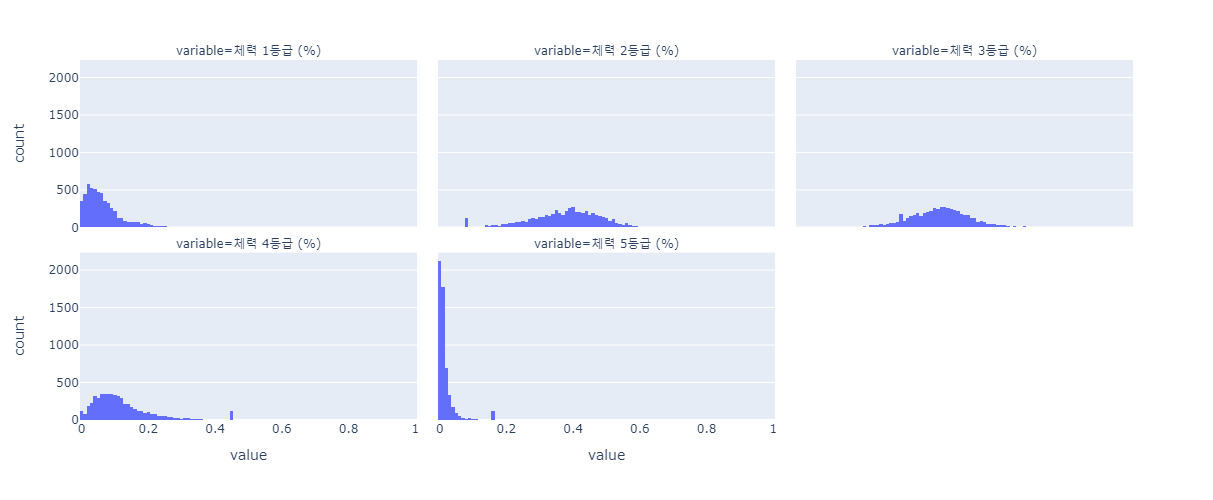

In [669]:
select_col = ['체력 1등급 (%)', '체력 2등급 (%)', '체력 3등급 (%)', '체력 4등급 (%)', '체력 5등급 (%)']
final_data[select_col].melt().plot(
        x = "value", kind = "hist", backend = "plotly", facet_col = "variable", facet_col_wrap = 3, height = 500)

해당 컬럼의 결측치들은 중앙값으로 채워주는 게 좋을 것 같다.

In [670]:
cols = ["체력 1등급 (%)", "체력 2등급 (%)", "체력 3등급 (%)", "체력 4등급 (%)", "체력 5등급 (%)"]

for i in cols :
    m = final_data[i].median()
    final_data[i].fillna(m, inplace = True)

# 14. 값 바꿔주기

In [675]:
final_data.iloc[:,:8].head()

,key,지역,정보공시 학교코드,학교명,교과교실제(지정?운영),자율학교(지정?운영),수준별 수업(운영),전체학생수
0,S000003511-2021,서울특별시 서초구,S000003511,서울교육대학교부설초등학교,×,○,×,614.0
1,S000003511-2022,서울특별시 서초구,S000003511,서울교육대학교부설초등학교,×,○,×,611.0
2,S000003511-2023,서울특별시 서초구,S000003511,서울교육대학교부설초등학교,×,○,×,612.0
3,S000003511-2024,서울특별시 서초구,S000003511,서울교육대학교부설초등학교,×,○,×,610.0
4,S000003514-2021,서울특별시 성북구,S000003514,서울대학교사범대학부설중학교,○,×,○,625.0


`-` 교과교실제 ~ 수준별 수업(운영)의 `O,X` 값을 `0,1`로 바꿔주자

In [683]:
final_data["교과교실제(지정?운영)"] = final_data["교과교실제(지정?운영)"].replace(['×', '○'],[0,1])
final_data["자율학교(지정?운영)"] = final_data["자율학교(지정?운영)"].replace(['×', '○'],[0,1])
final_data["수준별 수업(운영)"] = final_data["수준별 수업(운영)"].replace(['×', '○'],[0,1])

In [695]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5475 entries, 0 to 5474
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   key            5475 non-null   object 
 1   지역             5475 non-null   object 
 2   정보공시 학교코드      5475 non-null   object 
 3   학교명            5475 non-null   object 
 4   교과교실제(지정?운영)   5475 non-null   int64  
 5   자율학교(지정?운영)    5475 non-null   int64  
 6   수준별 수업(운영)     5475 non-null   int64  
 7   전체학생수          5475 non-null   float64
 8   연간1인당 보건실이용건수  5475 non-null   float64
 9   일반직계           5475 non-null   float64
 10  별정직계(2018년이후)  5475 non-null   float64
 11  기타직계(2019년이후)  5475 non-null   float64
 12  특수학급 학급당 학생수   5475 non-null   float64
 13  순회학급 학급당 학생수   5475 non-null   float64
 14  수업교원 1인당 학생수   5475 non-null   float64
 15  체육장 개방여부       5475 non-null   object 
 16  체육관 개방여부       5475 non-null   object 
 17  강당 개방여부        5475 non-null   object 
 18  일반교과교실 개

# 15. 데이터 저장 및 로드 확인

In [690]:
final_data.to_csv("total_set1.csv", index = False, encoding = "euc-kr")

In [694]:
pd.read_csv("total_set1.csv",encoding ="euc-kr")

,key,지역,정보공시 학교코드,학교명,교과교실제(지정?운영),자율학교(지정?운영),수준별 수업(운영),전체학생수,연간1인당 보건실이용건수,일반직계,...,수석교사(계),전문상담교사(계),사서교사(계),보건교사(계),영양교사(계),체력 1등급 (%),체력 2등급 (%),체력 3등급 (%),체력 4등급 (%),체력 5등급 (%)
0,S000003511-2021,서울특별시 서초구,S000003511,서울교육대학교부설초등학교,0,1,0,614.0,1.1,1.0,...,0.0,0.0,0.0,1.0,1.0,0.051930,0.386106,0.427475,0.098562,0.007538
1,S000003511-2022,서울특별시 서초구,S000003511,서울교육대학교부설초등학교,0,1,0,611.0,7.4,1.0,...,0.0,0.0,0.0,1.0,1.0,0.158140,0.516279,0.325581,0.000000,0.000000
2,S000003511-2023,서울특별시 서초구,S000003511,서울교육대학교부설초등학교,0,1,0,612.0,14.8,1.0,...,0.0,0.0,0.0,1.0,1.0,0.014019,0.196262,0.542056,0.210280,0.037383
3,S000003511-2024,서울특별시 서초구,S000003511,서울교육대학교부설초등학교,0,1,0,610.0,15.6,1.0,...,0.0,0.0,0.0,1.0,1.0,0.074766,0.504673,0.359813,0.060748,0.000000
4,S000003514-2021,서울특별시 성북구,S000003514,서울대학교사범대학부설중학교,1,0,1,625.0,2.3,3.0,...,0.0,0.0,0.0,1.0,1.0,0.074766,0.504673,0.359813,0.060748,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5470,S010006545-2023,서울특별시 강동구,S010006545,강빛중학교,0,0,0,210.0,8.1,10.0,...,0.0,1.0,0.0,1.0,1.0,0.042857,0.428571,0.385714,0.119048,0.023810
5471,S010006545-2024,서울특별시 강동구,S010006545,강빛중학교,0,0,0,263.0,7.3,10.0,...,0.0,2.0,0.0,1.0,2.0,0.026616,0.414449,0.425856,0.121673,0.011407
5472,S010006553-2022,서울특별시 강동구,S010006545,강빛중학교,0,0,0,263.0,7.3,10.0,...,0.0,2.0,0.0,1.0,2.0,0.026616,0.414449,0.425856,0.121673,0.011407
5473,S010006558-2022,서울특별시 송파구,S010006558,덕수고등학교(일반고),0,0,0,0.0,7.3,0.0,...,0.0,1.0,0.0,1.0,1.0,0.026616,0.414449,0.425856,0.121673,0.011407
